### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### **Loading Dataset**

In [2]:
raw_data = pd.read_csv('/content/Mega_Sports.csv')
print("Displaying Original Data:")
print(raw_data.head(10))

Displaying Original Data:
   ID           cntry cntry_code  year         gdppc  gdppc_lag2  gdppc_lag1  \
0   1       Australia        AUS  1993  31465.524070         NaN         NaN   
1   2         Austria        AUT  1993  38871.372240         NaN         NaN   
2   3         Belgium        BEL  1993  35964.605720         NaN         NaN   
3   4          Canada        CAN  1993  31330.783120         NaN         NaN   
4   5           Chile        CHL  1993  11605.237520         NaN         NaN   
5   6        Colombia        COL  1993   8850.754529         NaN         NaN   
6   7  Czech Republic        CZE  1993  20827.416940         NaN         NaN   
7   8         Denmark        DNK  1993  40075.213320         NaN         NaN   
8   9         Estonia        EST  1993  11933.395680         NaN         NaN   
9  10         Finland        FIN  1993  29344.472900         NaN         NaN   

        pop   unemp    lifeexp  ...       biz  evecount   gdppcgr  \
0  17667000  10.874  77.

### **Filtering Data - Choosing only useful data (2006-2019)**

In [3]:
data = raw_data[(raw_data['year'] >= 2006) & (raw_data['year'] <= 2019)]
print("Filtered Data for Analysis (2006-2019):")
print(data.head(10))

Filtered Data for Analysis (2006-2019):
     ID           cntry cntry_code  year        gdppc    gdppc_lag2  \
572   1       Australia        AUS  2006  43106.04404  41783.935340   
573   2         Austria        AUT  2006  51120.44956  48900.880390   
574   3         Belgium        BEL  2006  47250.21642  45576.770680   
575   4          Canada        CAN  2006  43534.37638  40590.510790   
576   5           Chile        CHL  2006  18995.17193  17254.408850   
577   6        Colombia        COL  2006  10684.74724   9812.093149   
578   7  Czech Republic        CZE  2006  32466.09481  28637.291090   
579   8         Denmark        DNK  2006  53449.60163  50566.988090   
580   9         Estonia        EST  2006  28847.38573  23735.797340   
581  10         Finland        FIN  2006  46453.89675  43764.328750   

      gdppc_lag1       pop   unemp    lifeexp  ...        biz  evecount  \
572  42557.36905  20697900   4.782  81.041463  ...   4.095024         1   
573  49658.78404   8268641  

## **Data Cleaning**

In [4]:
# Describing data to gain insights
data.describe()

,ID,year,gdppc,gdppc_lag2,gdppc_lag1,pop,unemp,lifeexp,popden,rural,...,biz,evecount,gdppcgr,gdppcgr_lag2,gdppcgr_lag1,TreatBRA,TreatGBR,TreatCAN,TreatZAF,expimp
count,616.000000,616.000000,616.000000,616.000000,616.000000,6.160000e+02,616.000000,616.000000,616.000000,616.000000,...,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000
mean,22.500000,2012.500000,37378.226355,36372.088816,36908.985730,1.041217e+08,7.829481,78.230509,133.091983,25.302617,...,4.529390,0.594156,1.846499,2.116600,1.996120,0.019481,0.022727,0.022727,0.022727,1.033635
std,12.708745,4.034405,19190.810146,19010.065663,19108.212057,2.725968e+08,4.724203,4.816257,133.867755,13.506729,...,10.516507,0.842508,3.365014,3.512140,3.451243,0.138319,0.149154,0.149154,0.149154,0.143117
min,1.000000,2006.000000,3444.863616,3047.627270,3237.553833,3.037820e+05,1.933000,53.795000,2.694232,1.999000,...,-58.322880,0.000000,-14.268765,-14.268765,-14.268765,0.000000,0.000000,0.000000,0.000000,0.643361
25%,11.750000,2009.000000,24602.685875,23382.433512,23986.543303,5.413826e+06,4.844250,75.689341,31.505915,14.811250,...,1.310360,0.000000,0.504025,0.661849,0.615442,0.000000,0.000000,0.000000,0.000000,0.958120
50%,22.500000,2012.500000,36748.437665,35984.351300,36239.157065,1.388968e+07,6.667000,80.010976,100.613850,22.396000,...,2.558018,0.000000,1.709355,1.940672,1.837586,0.000000,0.000000,0.000000,0.000000,1.028951
75%,33.250000,2016.000000,48612.416165,47820.964495,48302.563163,6.504968e+07,8.871250,81.490854,158.607900,32.507750,...,4.513030,1.000000,3.549380,3.844040,3.655742,0.000000,0.000000,0.000000,0.000000,1.112967
max,44.000000,2019.000000,115415.434700,115415.434700,115415.434700,1.392730e+09,28.489000,84.210976,529.358500,70.431000,...,86.589086,4.000000,23.985510,23.985510,23.985510,1.000000,1.000000,1.000000,1.000000,1.611060


In [5]:
# checking if there is any missing value in dataset
missing_values_count = data.isnull().sum()

print("Missing values in each column:")
print(missing_values_count)

Missing values in each column:
ID              0
cntry           0
cntry_code      0
year            0
gdppc           0
gdppc_lag2      0
gdppc_lag1      0
pop             0
unemp           0
lifeexp         0
popden          0
rural           0
tourarriv       0
export          0
import          0
grossexp        0
inflation       0
fertility       0
industry        0
biz             0
evecount        0
gdppcgr         0
gdppcgr_lag2    0
gdppcgr_lag1    0
TreatBRA        0
TreatGBR        0
TreatCAN        0
TreatZAF        0
expimp          0
dtype: int64


In [6]:
# checking data column types
column_data_types = data.dtypes

print("Data types of each column:")
print(column_data_types)

Data types of each column:
ID                int64
cntry            object
cntry_code       object
year              int64
gdppc           float64
gdppc_lag2      float64
gdppc_lag1      float64
pop               int64
unemp           float64
lifeexp         float64
popden          float64
rural           float64
tourarriv       float64
export          float64
import          float64
grossexp        float64
inflation       float64
fertility       float64
industry        float64
biz             float64
evecount          int64
gdppcgr         float64
gdppcgr_lag2    float64
gdppcgr_lag1    float64
TreatBRA          int64
TreatGBR          int64
TreatCAN          int64
TreatZAF          int64
expimp          float64
dtype: object


In [7]:
# Renaming Columns for Better Understanding using Mapping function

columns_mapping = {
    'cntry_code': 'country_code',
    'cntry': 'country',
    'pop': 'population',
    'unemp': 'unemployment_rate',
    'lifeexp': 'life_expectancy',
    'popden': 'population_density',
    'tourarriv': 'tourist_arrivals',
    'grossexp': 'gross_expenditure',
    'biz': 'business_activity',
    'evecount': 'event_count',
    'expimp': 'export_import_ratio'
}
data = data.rename(columns=columns_mapping)
print("Updated Column Names for Clarity:")
print(data.columns)

Updated Column Names for Clarity:
Index(['ID', 'country', 'country_code', 'year', 'gdppc', 'gdppc_lag2',
       'gdppc_lag1', 'population', 'unemployment_rate', 'life_expectancy',
       'population_density', 'rural', 'tourist_arrivals', 'export', 'import',
       'gross_expenditure', 'inflation', 'fertility', 'industry',
       'business_activity', 'event_count', 'gdppcgr', 'gdppcgr_lag2',
       'gdppcgr_lag1', 'TreatBRA', 'TreatGBR', 'TreatCAN', 'TreatZAF',
       'export_import_ratio'],
      dtype='object')


### **Data Outlier Checking- I did not eliminate outliers because doing so would result in the loss of valuable data.**

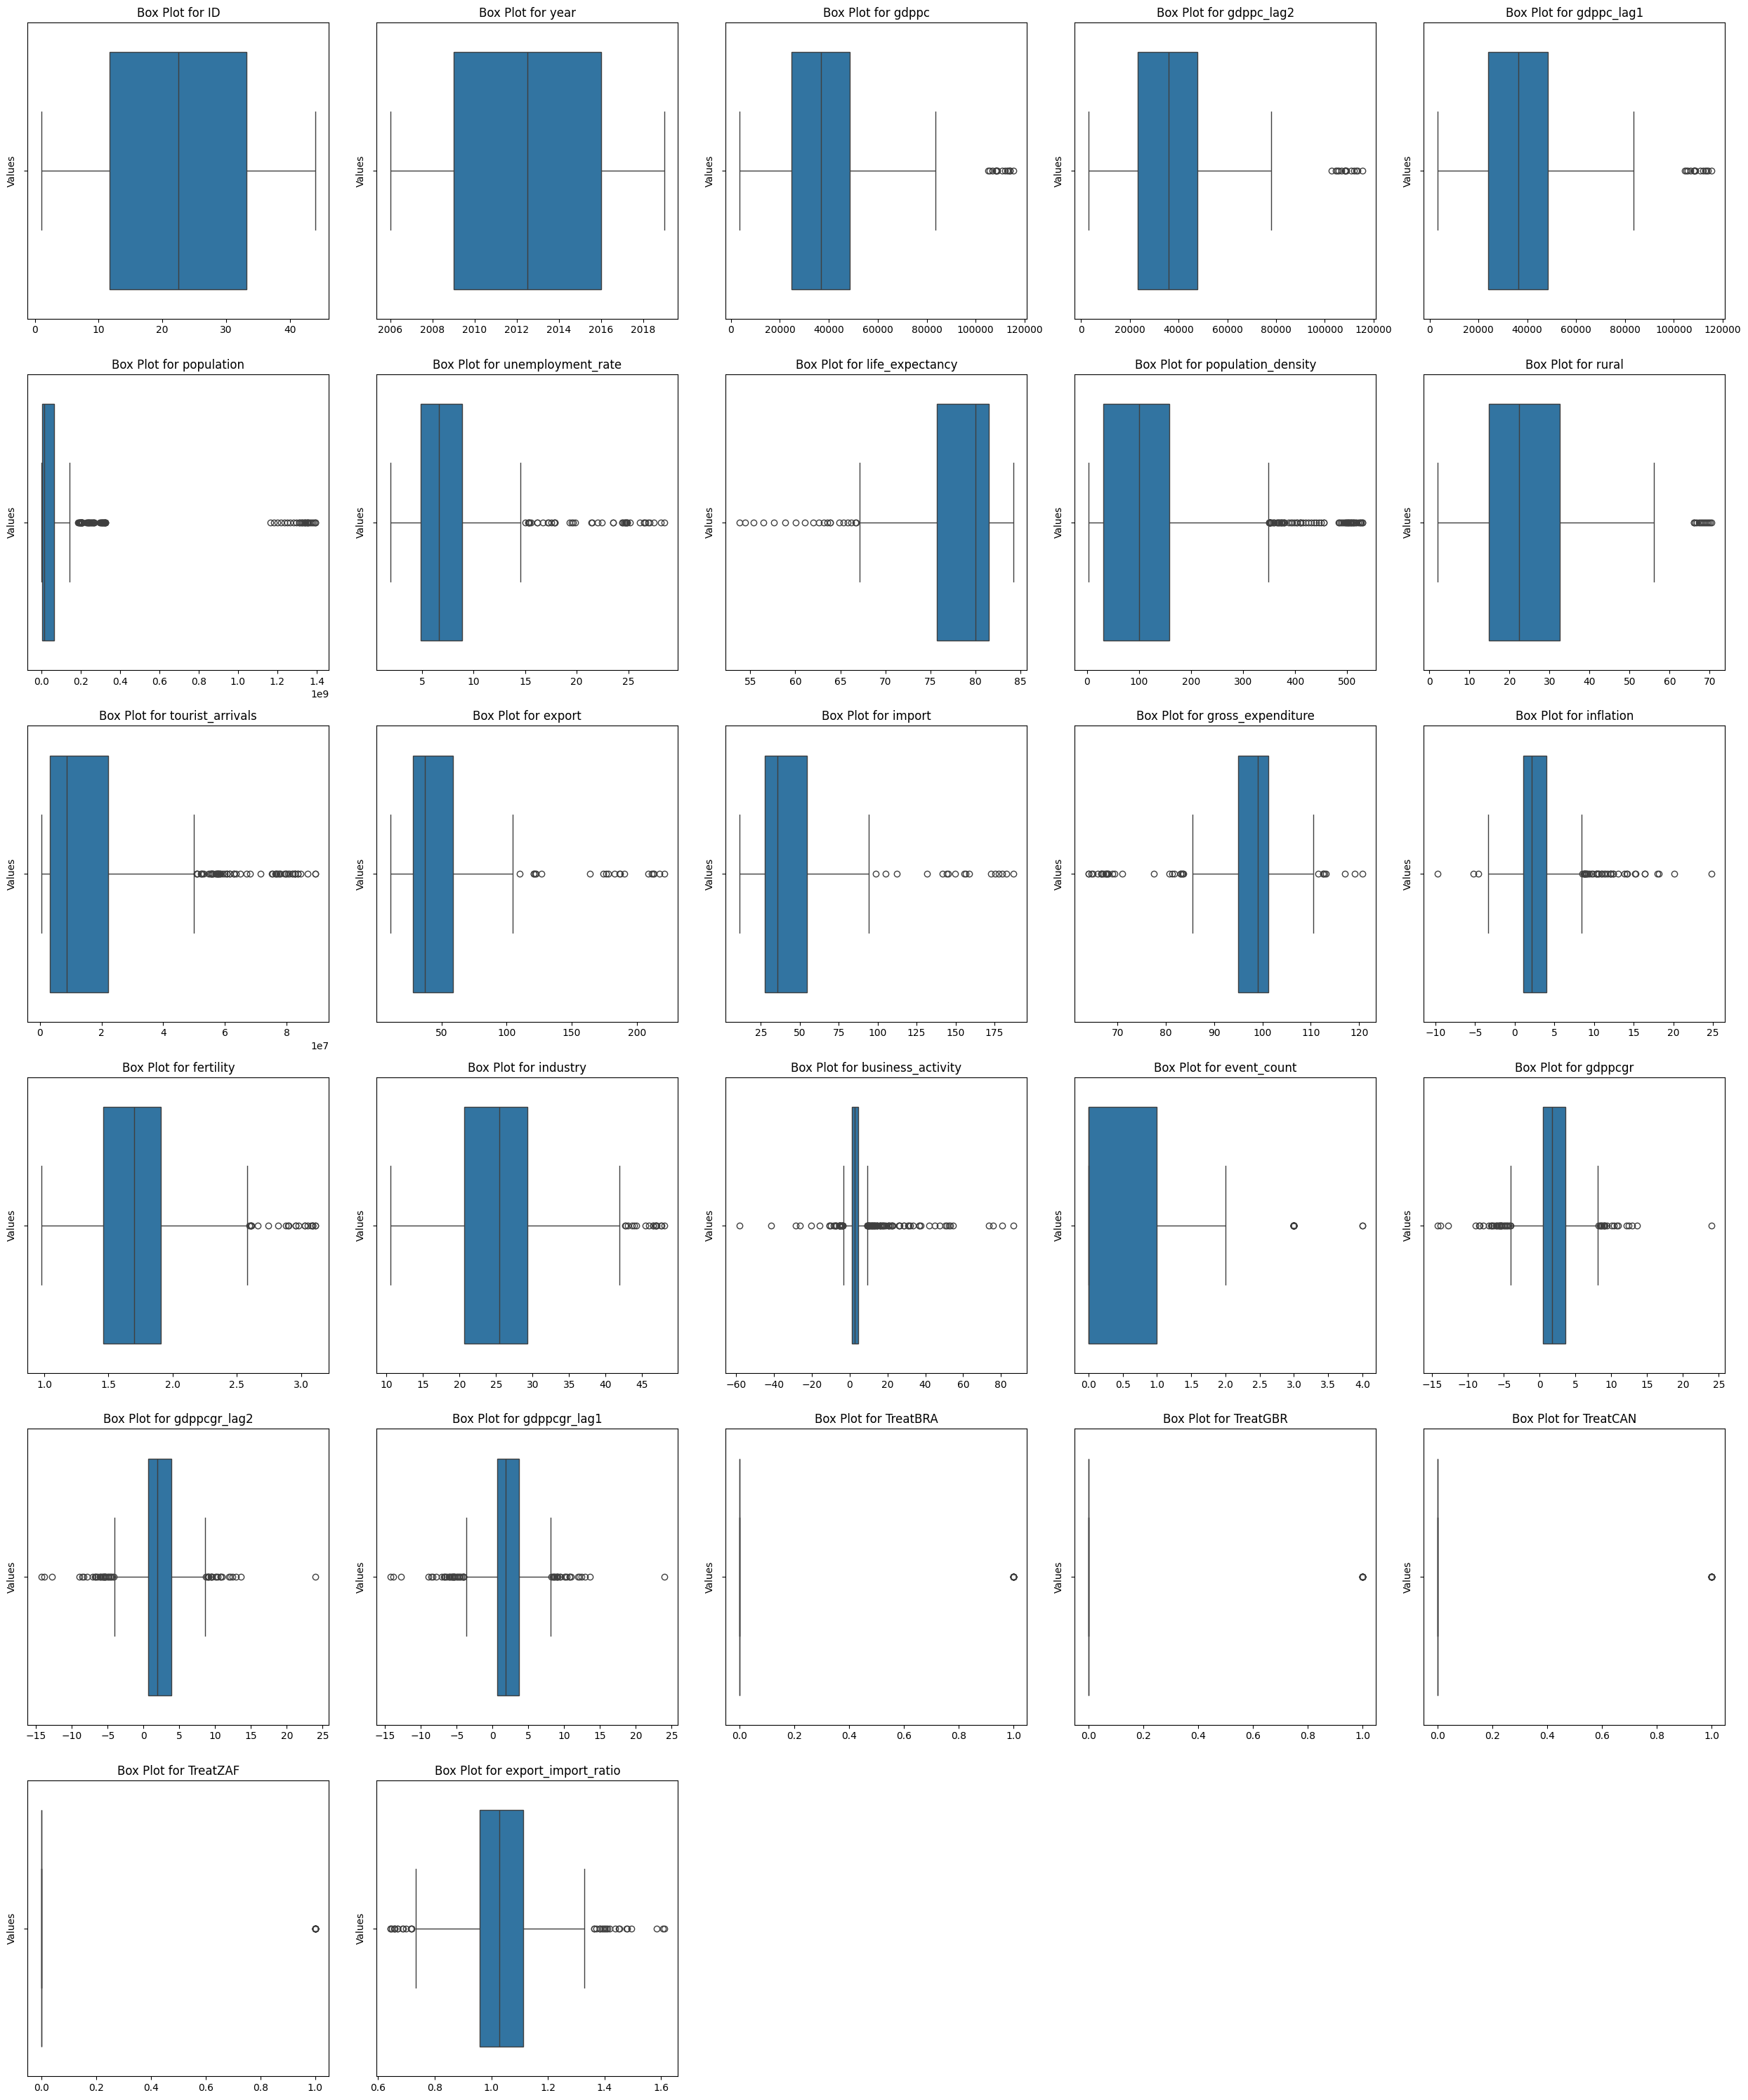

In [8]:
# Plotting Box Plots for All Numerical Features
# This visualizes the distribution and identifies outliers for each numerical column in the dataset.
n_cols = 5
numerical_columns = data.select_dtypes(include=np.number).columns
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculating required rows

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 5))
axes = axes.flatten()  # Flattening the 2D array of axes to simplify indexing

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Values')

# Hiding any unused axes if the number of columns isn't a perfect multiple of n_cols
for j in range(i + 1, n_rows * n_cols):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### **Feature Scaling**

In [9]:
# Scaling Numeric Features in a DataFrame with StandardScaler

# Specifying columns not to scale
excluded_columns = ['ID', 'country', 'country_code', 'year']

# Specifying columns to scale
columns_to_process = [col for col in data.columns if col not in excluded_columns]

# Initializing the StandardScaler
scaler = StandardScaler()

# Directly scaling these columns in the DataFrame using .loc for safe operation
data.loc[:, columns_to_process] = scaler.fit_transform(data[columns_to_process])

# Verifying the updated data
print("Updated Data with Standardized Columns:")
print(data.head(5))


Updated Data with Standardized Columns:
     ID    country country_code  year     gdppc  gdppc_lag2  gdppc_lag1  \
572   1  Australia          AUS  2006  0.298709    0.284915    0.295840   
573   2    Austria          AUT  2006  0.716665    0.659597    0.667784   
574   3    Belgium          BEL  2006  0.514830    0.484594    0.496009   
575   4     Canada          CAN  2006  0.321047    0.222085    0.278051   
576   5      Chile          CHL  2006 -0.958688   -1.006478   -0.987436   

     population  unemployment_rate  life_expectancy  ...  business_activity  \
572   -0.306282          -0.645602         0.584113  ...          -0.041337   
573   -0.351915          -0.547941         0.342864  ...          -0.133636   
574   -0.343547           0.088239         0.238964  ...           0.941243   
575   -0.262691          -0.319780         0.439161  ...           0.034162   
576   -0.322229           0.253057        -0.075952  ...           0.035366   

     event_count   gdppcgr  gdppcg

### **Exploratory Data Analysis**

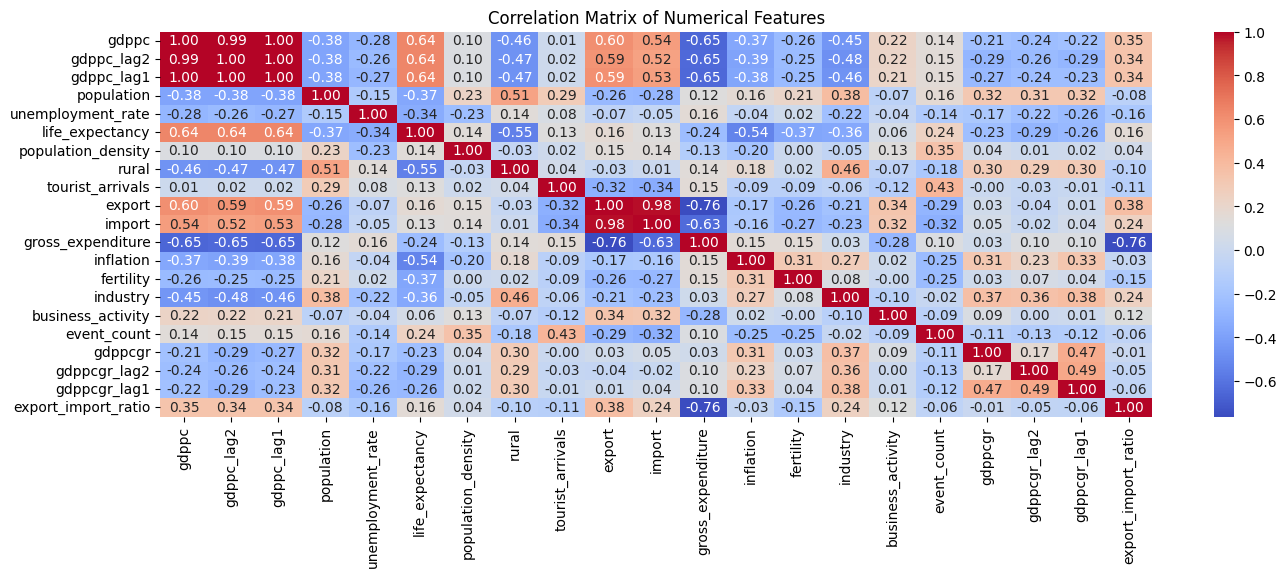

In [10]:
# Correlations between numerical features
# Excluding columns from the correlation matrix

columns_to_exclude = ['ID', 'year', 'TreatBRA', 'TreatGBR', 'TreatCAN', 'TreatZAF']

numerical_data = data.select_dtypes(include=['int64', 'float64']).drop(columns=columns_to_exclude)

# Calculating the correlation matrix
corr_matrix = numerical_data.corr()

# Plotting heatmap
plt.figure(figsize=(16, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [11]:
# Specifying the suitable/matching features from Correlation map
selected_features = ['population', 'rural', 'inflation', 'industry']

fig = px.scatter_matrix(data,
                        dimensions=selected_features,
                        color='country',
                        title="Scatter Matrix of Selected Features",
                        labels={col: col.replace('_', ' ').title() for col in selected_features})

fig.update_layout(
    title_font_size=20,
    height=1100,
    width=1300
)

fig.show()

In [12]:
# Creating a line chart
fig = px.line(data, x='year', y='gdppcgr', color='country',
              title='GDP Per Capita Growth Rate Over Time for Each Country')

fig.update_layout(
    legend_title='Country',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.5,
        xanchor="center",
        x=0.5
    ),
    xaxis_title="Year",
    yaxis_title="GDP Per Capita Growth Rate (%)"
)

# Display the chart
fig.show()


### **Silhouette Score Method**

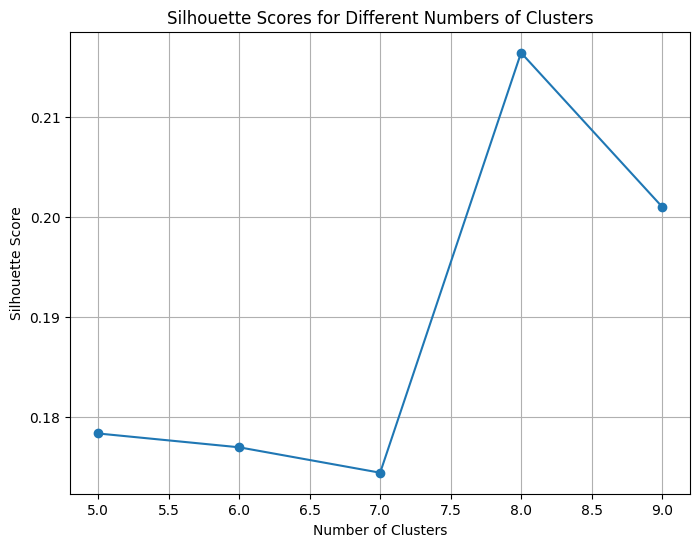

Optimal number of clusters: 8


In [13]:
# Evaluate clustering effectiveness using silhouette scores, which measure how similar an object is to its own cluster compared to other clusters
# Initializing the KMeans cluster

range_n_clusters = range(5, 10)

silhouette_avg_scores = []
for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=50)

    cluster_labels = clusterer.fit_predict(data[columns_to_process])

    silhouette_avg = silhouette_score(data[columns_to_process], cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

# Plotting the silhouette scores to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Determining the optimal number of clusters based on the highest silhouette score
optimal_clusters = range_n_clusters[np.argmax(silhouette_avg_scores)]
print(f"Optimal number of clusters: {optimal_clusters}")


### **PCA for dimensionality reduction**

In [14]:
# Key features from Correlation heatmap
features = ['population', 'rural', 'inflation', 'industry']
data.loc[:, features] = scaler.fit_transform(data[features])

In [15]:
# Performing principal component analysis
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data[features])

data.loc[:, 'PCA1'] = pca_results[:, 0]
data.loc[:, 'PCA2'] = pca_results[:, 1]


In [16]:
# Identifying the optimal number of clusters from silhouette scores=8
kmeans = KMeans(n_clusters=8, random_state=50) # Setting random_state to 50 to ensure reproducibility across runs. This helps in consistent cluster initialization.
data['cluster'] = kmeans.fit_predict(data[['PCA1', 'PCA2']])

# Plotting PCA results with clusters
fig = px.scatter(data, x='PCA1', y='PCA2', color='cluster',
                 hover_name='country',
                 title="PCA Clustering Results",
                 labels={'cluster': 'Cluster Label'})

fig.show()

## **Synthetic Control Analysis - Constructing and Evaluating**

In [17]:
# Setting up event years and defining a 3-year window for analysis before and after the event
event_years = {
    'Brazil': 2014,
    'United Kingdom': 2012,
    'Canada': 2010,
    'South Africa': 2010
}
window = 3
results = {}

In [18]:
for country, event_year in event_years.items():

    # Filtering the treatment data within the specified window(3 years)
    treatment_mask = (data['country'] == country) & (data['year'].between(event_year - window, event_year + window))
    treatment_data = data[treatment_mask]

    # Ensuring the control data does not include the treatment country
    control_mask = (data['cluster'] == treatment_data['cluster'].iloc[0]) & (data['country'] != country)
    control_data = data[control_mask]

    # Linear regression model to predict GDPPCGR
    model = LinearRegression()
    model.fit(control_data[['PCA1', 'PCA2']], control_data['gdppcgr'])
    predicted = model.predict(treatment_data[['PCA1', 'PCA2']])

    # Calculating metrics: MSPE, Sigma, and ATT
    mspe = mean_squared_error(treatment_data['gdppcgr'], predicted)  # Mean Squared Prediction Error (MSPE)
    sigma = np.std(treatment_data['gdppcgr'] - predicted) # Sigma: Standard Deviation of the Errors
    att = np.mean(treatment_data['gdppcgr'] - predicted) #  Average Treatment Effect on the Treated (ATT)

    # Storing Results for each country
    results[country] = {
        'Predicted': predicted,
        'Actual': treatment_data['gdppcgr'].values,
        'Years': treatment_data['year'].values,
        'MSPE': mspe,
        'Sigma': sigma,
        'ATT': att,
        'Donor Pool Countries': control_data['country'].unique().tolist()
    }

## **Synthetic Control Method - Results and Comparison**

In [19]:
# Creating DataFrame to display the results
results_list = []
for country, info in results.items():
    results_list.append({
        'Country': country,
        'MSPE': info['MSPE'],
        'Sigma': info['Sigma'],
        'ATT': info['ATT'],
        'Predicted Mean': np.mean(info['Predicted']),
        'Actual Mean': np.mean(info['Actual']),
        'Donor Pool': ', '.join(info['Donor Pool Countries'])
    })

results_df = pd.DataFrame(results_list)

# Table for easy understanding of model evaluation values/Results
display(results_df)

,Country,MSPE,Sigma,ATT,Predicted Mean,Actual Mean,Donor Pool
0,Brazil,0.765640,0.790261,0.375670,-1.014721,-0.639051,"Estonia, Iceland, Latvia, Lithuania, Mexico, N..."
1,United Kingdom,0.455486,0.661813,-0.132249,-0.307756,-0.440005,"Belgium, Denmark, France, Greece, Israel, Luxe..."
2,Canada,1.038081,0.980318,-0.277593,0.057011,-0.220582,"Finland, Germany, Italy, Japan, Korea, Rep., S..."
3,South Africa,1.183314,0.571386,-0.925652,0.702172,-0.223480,"Estonia, Iceland, Latvia, Lithuania, Mexico, N..."


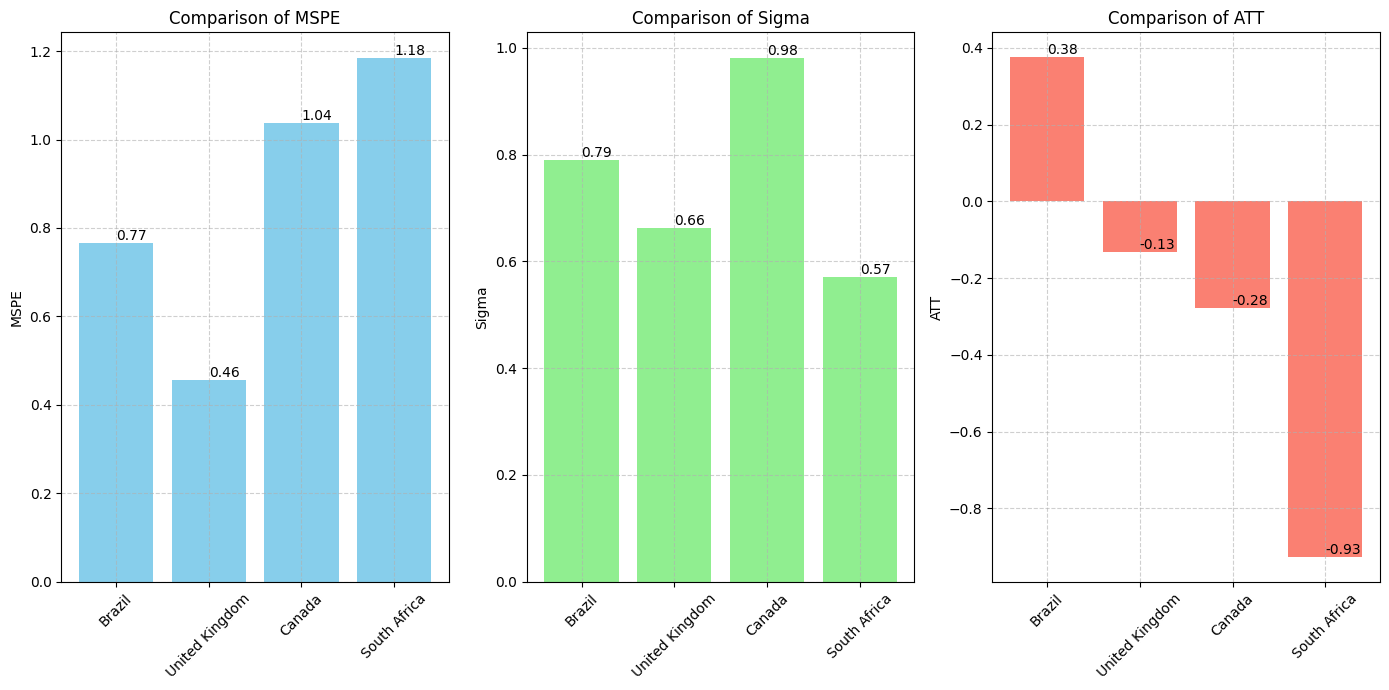

In [20]:
# Creating comparison charts
metrics = ['MSPE', 'Sigma', 'ATT']
colors = ['skyblue', 'lightgreen', 'salmon']

plt.figure(figsize=(14, 7))

# Loop through each metric to create a bar chart
for i, metric in enumerate(metrics):
    ax = plt.subplot(1, 3, i+1)  # Creating subplots for side-by-side comparison
    countries = list(results.keys())
    values = [results[country][metric] for country in countries]
    bars = ax.bar(countries, values, color=colors[i])

    # Labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # vertical alignment

    plt.title(f'Comparison of {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)  # Grid for easier value reading

plt.tight_layout()
plt.show()

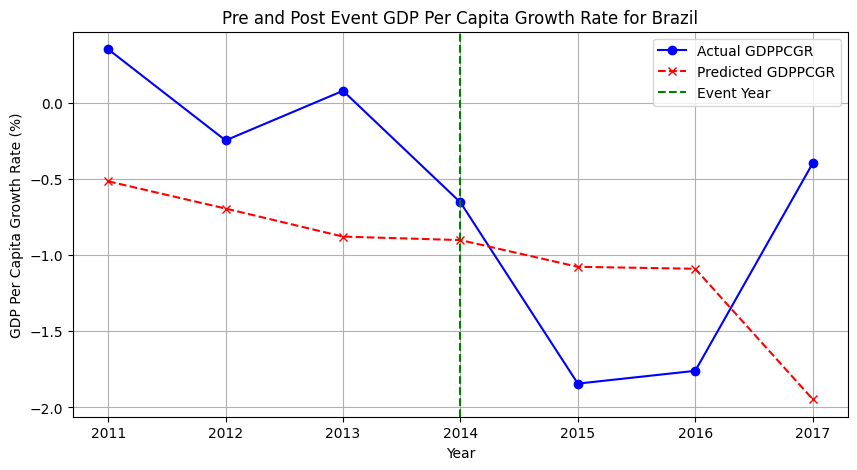

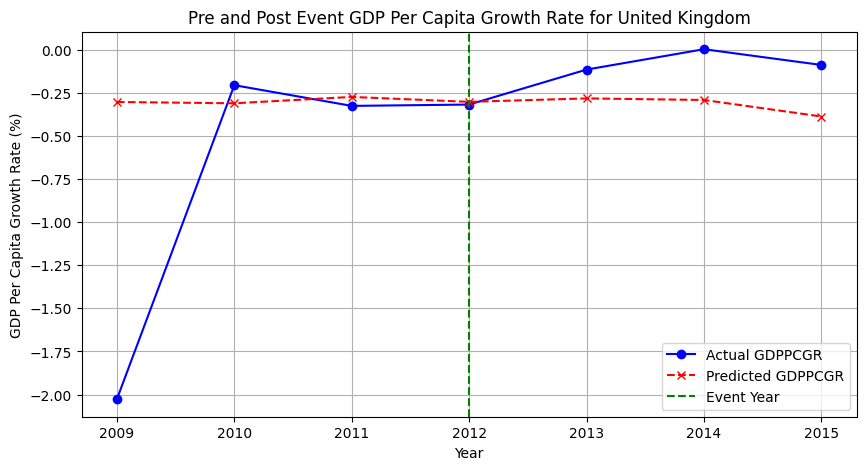

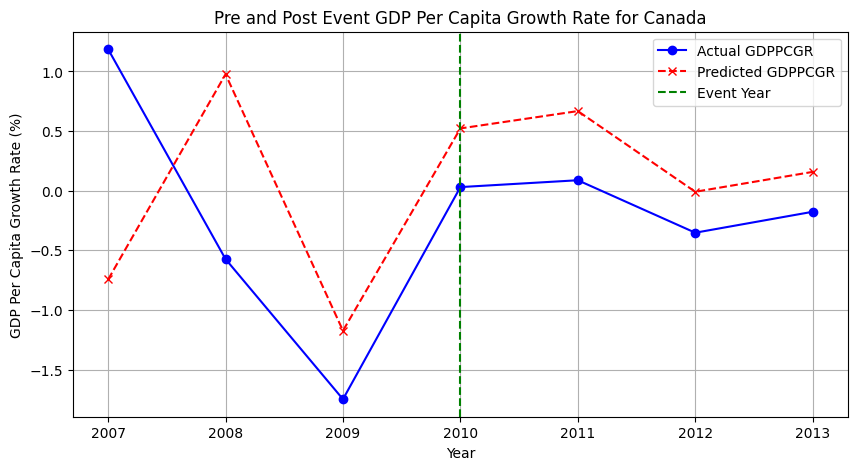

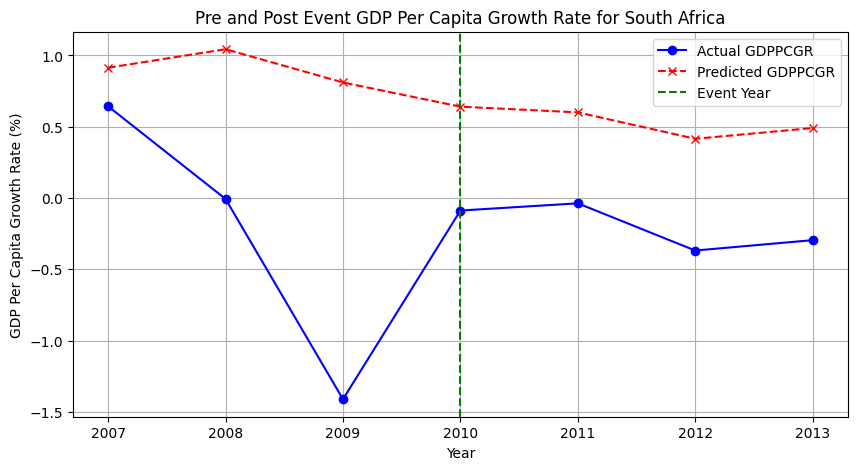

In [21]:
def plot_performance(data, results, country, event_year, window=3):
    years_range = list(range(event_year - window, event_year + window + 1))

    # Extracting actual and predicted data
    actual = data[(data['country'] == country) & (data['year'].isin(years_range))]['gdppcgr'].values
    predicted = results[country]['Predicted']
    years = data[(data['country'] == country) & (data['year'].isin(years_range))]['year'].values

    # Creating the plot
    plt.figure(figsize=(10, 5))
    plt.plot(years, actual, label='Actual GDPPCGR', marker='o', color='blue')
    plt.plot(years, predicted, label='Predicted GDPPCGR', linestyle='--', color='red', marker='x')
    plt.title(f"Pre and Post Event GDP Per Capita Growth Rate for {country}")
    plt.xlabel('Year')
    plt.ylabel('GDP Per Capita Growth Rate (%)')
    plt.axvline(x=event_year, color='green', linestyle='--', label='Event Year')
    plt.legend()
    plt.grid(True)
    plt.show()

# Defining Event years
event_years = {
    'Brazil': 2014,
    'United Kingdom': 2012,
    'Canada': 2010,
    'South Africa': 2010
}

# Iterate over each country to plot performance
for country in event_years:
    plot_performance(data, results, country, event_years[country], window)



# ***Metrix Operated in my Research***

1.The **Mean Squared Prediction Error (MSPE)** is the average of the squared differences between what the economic outcomes would have been if the event hadn't happened and what they were. It helps figure out how well the synthetic control model can predict what will happen.

2.The **Average Treatment Effect on the Treated (ATT)** determines the average difference in economic outcomes (GDP growth) between the host countries and a control group of non-host countries. This estimates the events' direct effects.  

3.**Sigma (π)** shows how different the model's predictions are from one set of data to the next. This lets us know how consistent the model's predictions are across the dataset.

4.The **Predicted mean** shows what the model thinks will happen to the economy if the host countries don't actually host the events. It can be used as a standard to scale the impact of actual events on the economy.

5.The **Actual mean** the average result after the event. We compare it to the expected outcome to determine the true impact of the event.

6.Countries that are economically similar to the host but did not host the event make up the **Donor pool**. I use these countries to construct the synthetic control, simulating the outcome if the event had not occurred.



